In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

#getting data from yfinance
data = yf.download('EURUSD=X', start='2022-08-01', end='2024-08-01')
close = data['Close']

#DataFrame
df = pd.DataFrame(close)
df.reset_index(inplace=True)
print(df)

[*********************100%%**********************]  1 of 1 completed

          Date     Close
0   2022-08-01  1.020825
1   2022-08-02  1.026136
2   2022-08-03  1.015569
3   2022-08-04  1.015765
4   2022-08-05  1.024779
..         ...       ...
518 2024-07-25  1.083952
519 2024-07-26  1.085128
520 2024-07-29  1.085376
521 2024-07-30  1.081947
522 2024-07-31  1.081607

[523 rows x 2 columns]


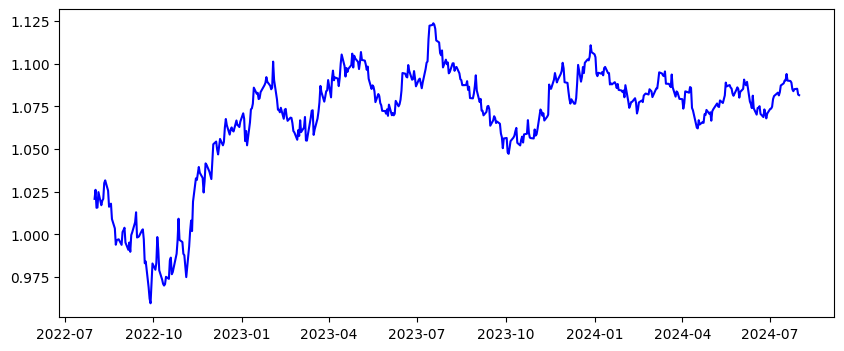

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(df['Date'],df['Close'],color = 'blue')


# Split the data in sample and out of sample

In [3]:
train = df

# Apply Seasonal trend decomposition aka STL on close prices using statsmodels

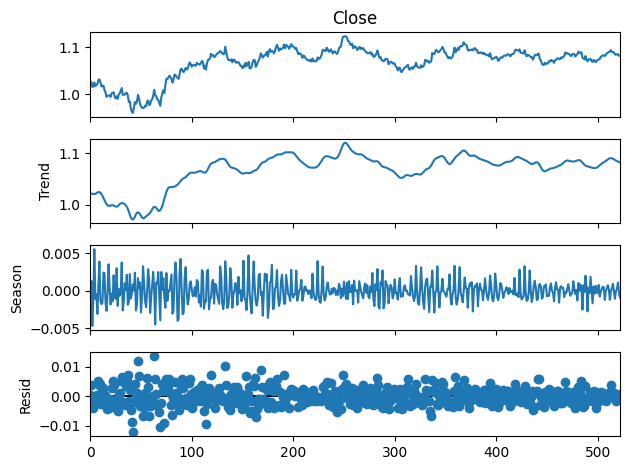

In [4]:
from statsmodels.tsa.seasonal import STL

stl = STL(train['Close'],period = 5)
result = stl.fit()

#visualisation
result.plot()
plt.show()

# visualisation of residual as histogram

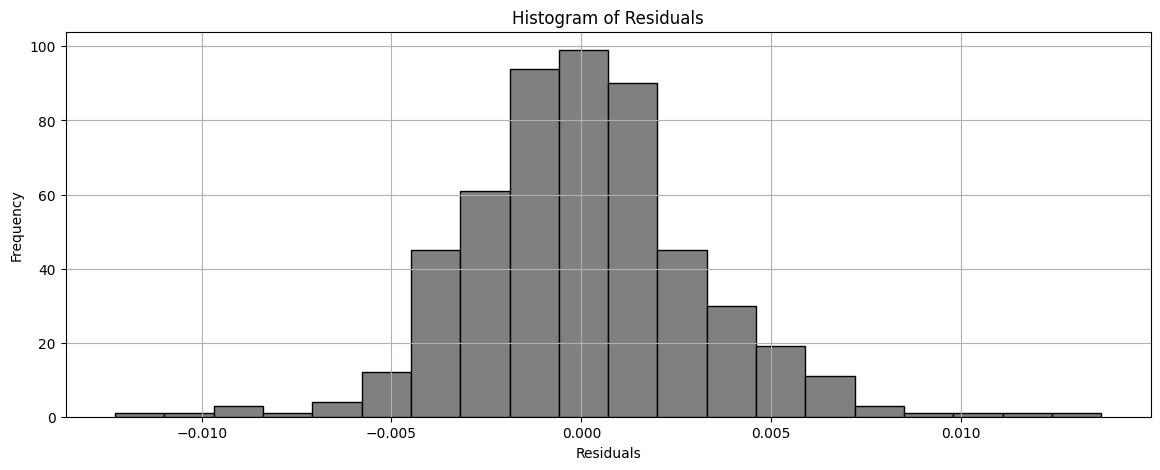

In [5]:
plt.figure(figsize=(14, 5))
plt.hist(result.resid, bins=20 ,color='gray', edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

# finding thresholds

when the residual value  is higher than upthreshold so it's a signal of sell,and if it's lower than lowthreshold it's a signal of buy.

In [6]:
rs_mean = result.resid.mean()
rs_std = result.resid.std()
UPthreshold = rs_mean + 2 * rs_std
LOWthreshold = rs_mean - 2 * rs_std

# visualisation sell and buy signals

,Date,Close,buy_signal,sell_signal
0,2022-08-01,1.020825,False,False
1,2022-08-02,1.026136,False,False
2,2022-08-03,1.015569,False,False
3,2022-08-04,1.015765,False,False
4,2022-08-05,1.024779,False,False
...,...,...,...,...
518,2024-07-25,1.083952,False,False
519,2024-07-26,1.085128,False,False
520,2024-07-29,1.085376,False,False
521,2024-07-30,1.081947,False,False


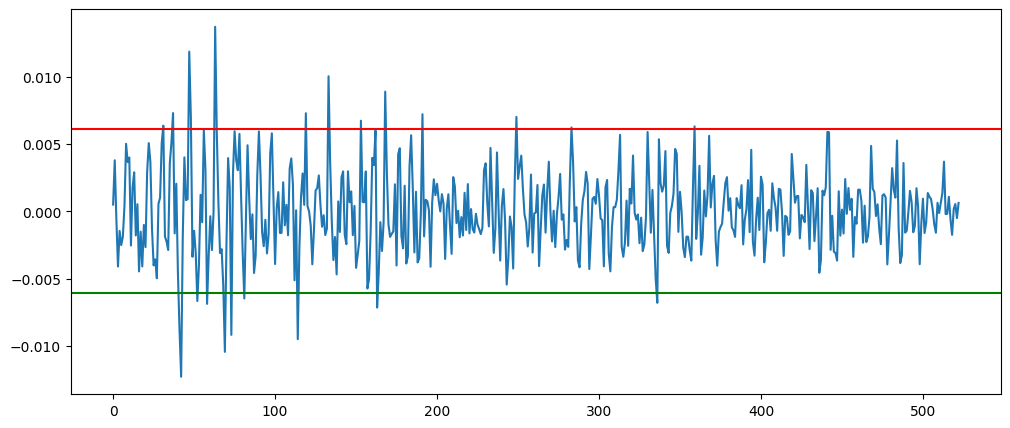

In [7]:
train['buy_signal'] = result.resid < LOWthreshold
train['sell_signal'] = result.resid > UPthreshold
plt.figure(figsize = (12,5))
plt.plot(train.index, result.resid)
plt.axhline(y=UPthreshold, color='red')
plt.axhline(y=LOWthreshold, color='green')
train

# simulation of the strategy 

sell 1.0129557847976685 on 2022-09-13 00:00:00
buy 0.9623712301254272 on 2022-09-27 00:00:00
sell 0.998432457447052 on 2022-10-05 00:00:00
buy 0.9700167775154114 on 2022-10-12 00:00:00
sell 1.009193778038025 on 2022-10-27 00:00:00
buy 0.9749630093574524 on 2022-11-04 00:00:00
sell 1.0860239267349243 on 2023-01-13 00:00:00
buy 1.0583354234695435 on 2023-03-16 00:00:00
sell 1.0870392322540283 on 2023-03-23 00:00:00
buy 1.0701825618743896 on 2023-11-14 00:00:00
sell 1.0993602275848389 on 2023-12-15 00:00:00


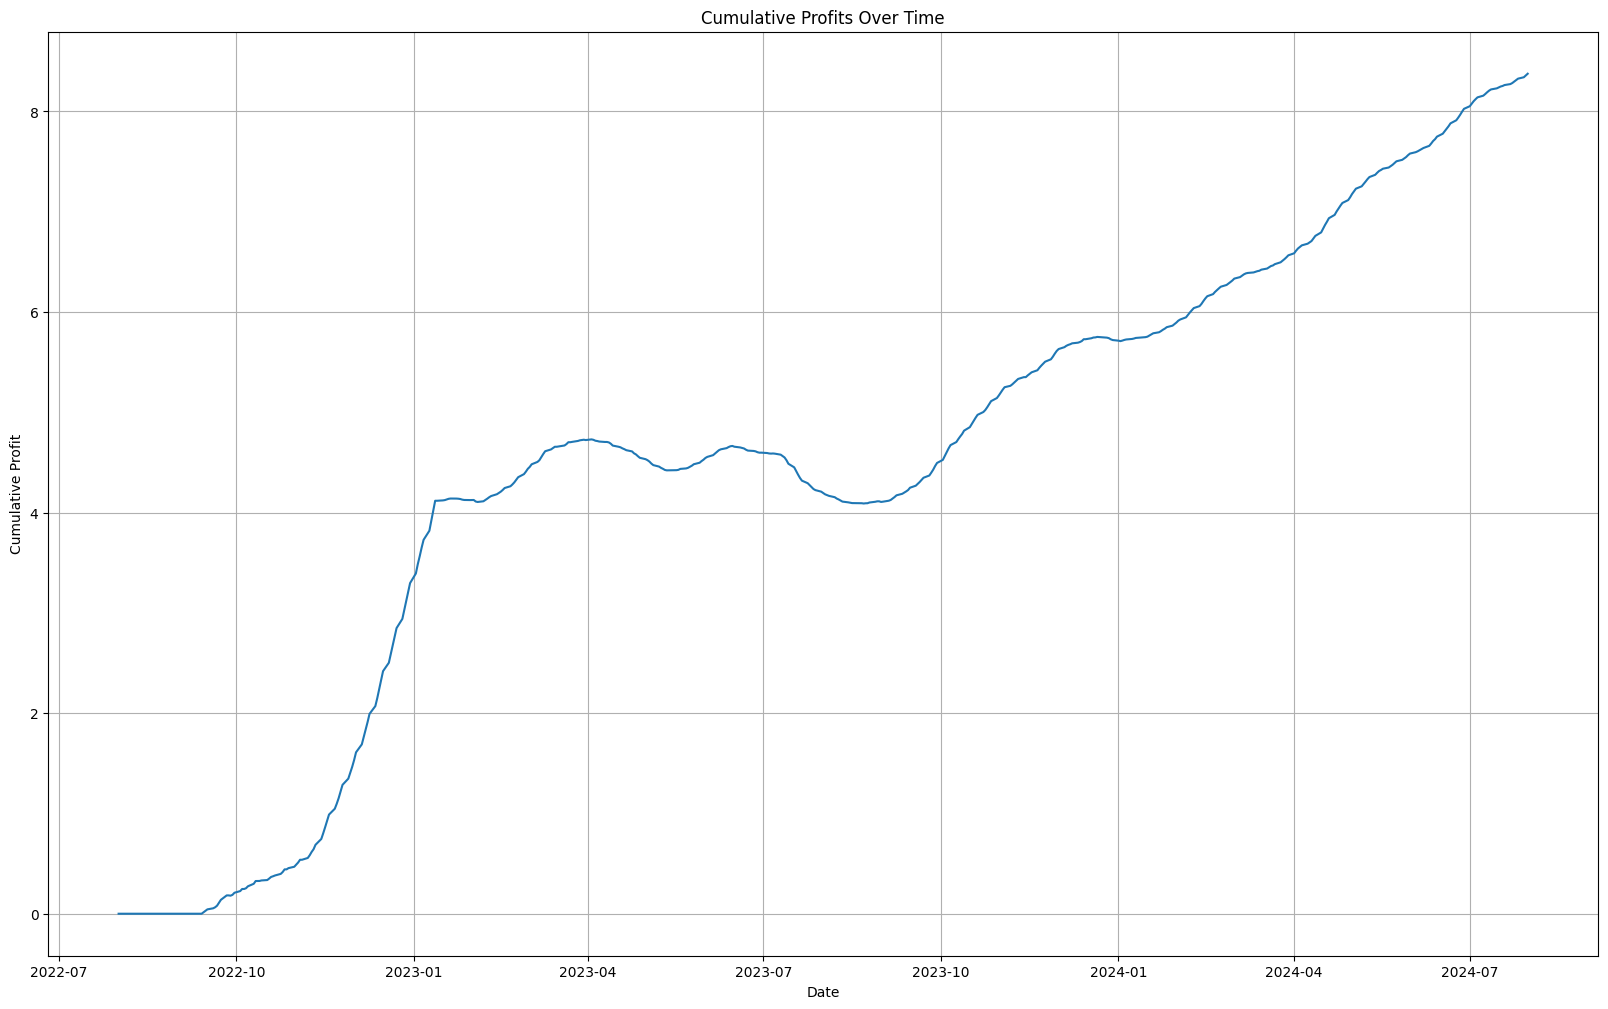

In [8]:
volume = 0
position = 0
profits = []
cumul = 0

# Trading logic based on RSI signals
for i in range(len(train)):
    if train['buy_signal'].iloc[i] and position != 1:
        position = 1
        positionprice = train['Close'].iloc[i]
        print(f"buy {positionprice} on {train['Date'].iloc[i]}")
    elif train['sell_signal'].iloc[i] and position != -1 :
        position = -1
        positionprice = train['Close'].iloc[i]
        print(f"sell {positionprice} on {train['Date'].iloc[i]}")


    if position == 1:
        train.at[i, 'Position'] = 1
        profit = train['Close'].iloc[i] - positionprice
    elif position == -1 :
        train.at[i, 'Position'] = -1
        profit = positionprice - train['Close'].iloc[i]
    else :
        profit = 0

    cumul = cumul + profit
    profits.append(cumul)


# Plot cumulative profits over time
plt.figure(figsize=(20, 12))
plt.plot(data.index, profits)
plt.title('Cumulative Profits Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Profit')
plt.grid(True)
plt.show()


In [9]:
train.head(50)

,Date,Close,buy_signal,sell_signal,Position
0,2022-08-01,1.020825,False,False,NaN
1,2022-08-02,1.026136,False,False,NaN
2,2022-08-03,1.015569,False,False,NaN
3,2022-08-04,1.015765,False,False,NaN
4,2022-08-05,1.024779,False,False,NaN
5,2022-08-08,1.017087,False,False,NaN
6,2022-08-09,1.019763,False,False,NaN
7,2022-08-10,1.020814,False,False,NaN
8,2022-08-11,1.030078,False,False,NaN
9,2022-08-12,1.031672,False,False,NaN


Text(0.5, 1.0, 'Cumulative Profit')

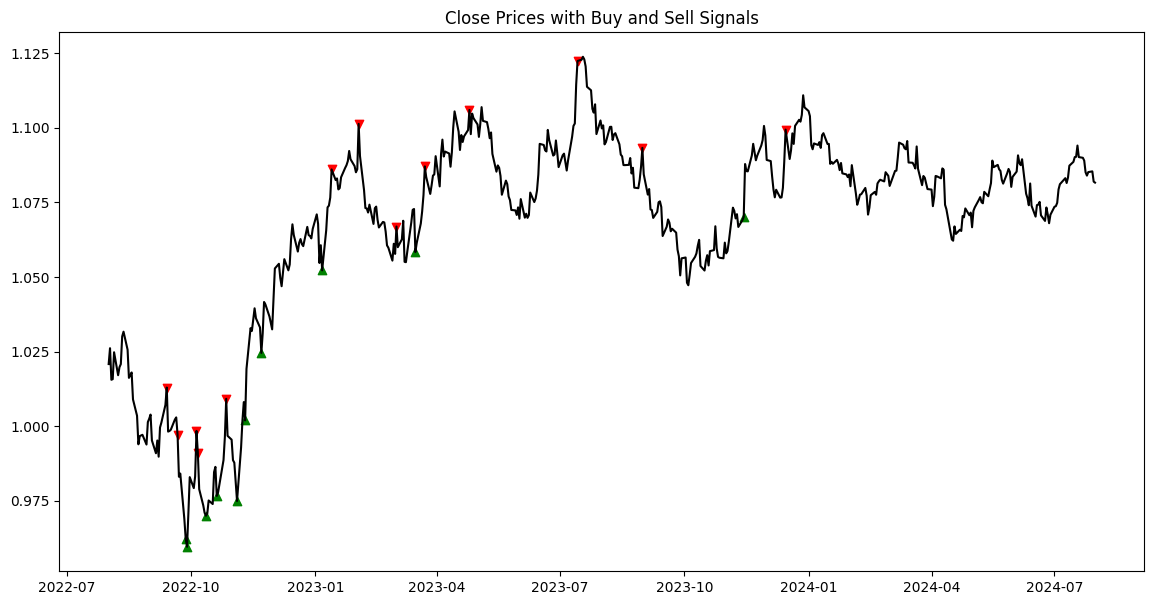

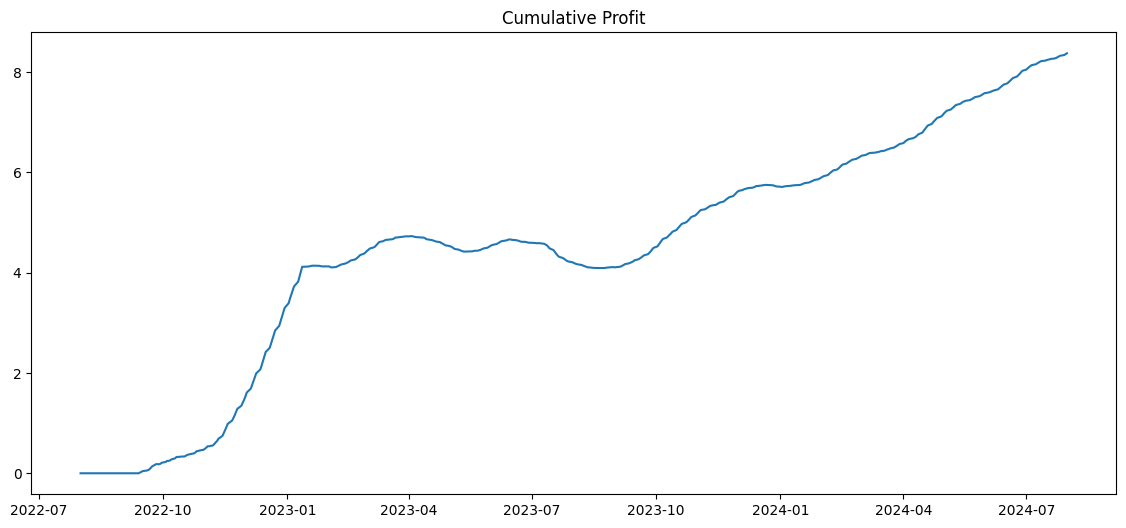

In [10]:
plt.figure(figsize=(14, 7))
plt.plot(train['Date'], train['Close'],label = 'Close price',color = 'black')
#isolate the true value of buy_signals and sell signals from the frame
buy_signals = train[train['buy_signal']]
sell_signals = train[train['sell_signal']]
#draw the marker that indicate the signal
plt.scatter(buy_signals['Date'],buy_signals['Close'],marker = '^',color = 'green')
plt.scatter(sell_signals['Date'],sell_signals['Close'],marker = 'v',color = 'red')
plt.title('Close Prices with Buy and Sell Signals')
# Cumulative Profit
plt.figure(figsize=(14,6))
plt.plot(train['Date'], profits, label='Cumulative Profit')
plt.title('Cumulative Profit')

# log returns

In [11]:
train['LogReturn'] = np.log(train['Close'] / train['Close'].shift(1))

<Axes: >

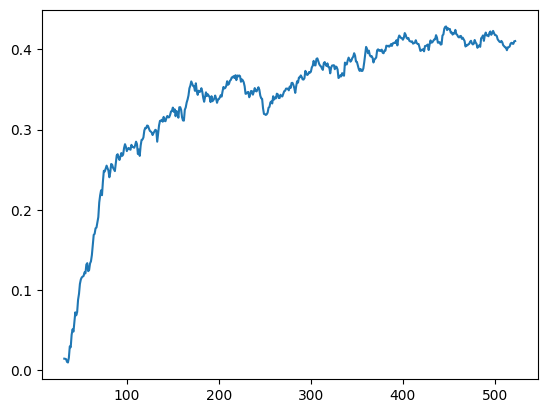

In [12]:
train['Strategy Return'] = train['LogReturn'] * train['Position'].shift(1)
train['Strategy Return'].cumsum().plot() #plot the cumulative of strategy return


# backtesting

In [13]:
import quantstats as qs
qs.extend_pandas()
train['Date'] = pd.to_datetime(train['Date'])
train.set_index('Date', inplace=True)
qs.reports.html(train['Strategy Return'], output='backtest_report.html')

/home/zaid/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/zaid/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/zaid/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, 

Si on vous pose la question "C'est quoi la méthode de réversion à la moyenne dans le contexte de ce projet ?", vous pouvez répondre de la manière suivante :

La méthode de réversion à la moyenne, dans le contexte de ce projet, consiste à supposer que le prix d'un actif, en l'occurrence la paire de devises EUR/USD, fluctue autour d'une moyenne historique. Lorsque les prix s'éloignent trop de cette moyenne, que ce soit à la hausse ou à la baisse, il est probable qu'ils reviendront vers celle-ci.

# mean reverse strategy

En somme, la stratégie de réversion à la moyenne utilisée dans ce projet repose sur l'idée que les prix reviennent à leur moyenne historique, et nous avons exploité cette dynamique pour générer des signaux d'achat et de vente, et ainsi optimiser nos décisions d'investissement.

# resid using:

En résumé, l'utilisation des résidus de la série temporelle dans ce projet offre une méthode plus raffinée et statistiquement pertinente pour identifier les signaux de réversion à la moyenne, en se concentrant sur les variations significatives autour de la tendance centrale.
